### Dataset Information
#### This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

###### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

##### Importing dataset

In [24]:
df = pd.read_csv("mushrooms.csv")
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [3]:
#To get the details of all rows
pd.set_option('display.max_rows',None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### We dont have any null values in the dataset and all column have datatype as object

In [5]:
df.shape

(8124, 23)

###### In the dataset we have 8124 rows and 23 columns including the target(target column is ' class')

In [6]:
print(df[['class']].value_counts()['e'])
print(df[['class']].value_counts()['p'])

class
e        4208
dtype: int64
class
p        3916
dtype: int64


#### Lets represent the class distibution graphically

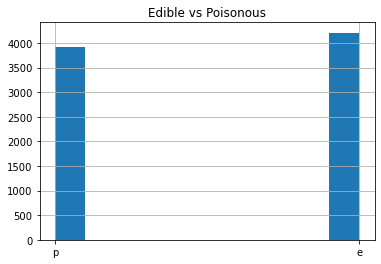

In [7]:
df["class"].hist(grid=True)
plt.title("Edible vs Poisonous")
plt.show()

###### Data is balanced

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Got insights about how many classes are present inside a column. For ex. cap-shape have 6 classes, cap-surface have 4 classes etc

#### Since all the columns are categorical lets convert that to numerical data and then lets perform EDA

In [25]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


##### Converted categorical datas to numerical using label encoder

#### Lets plot the grapg to see the data distribution

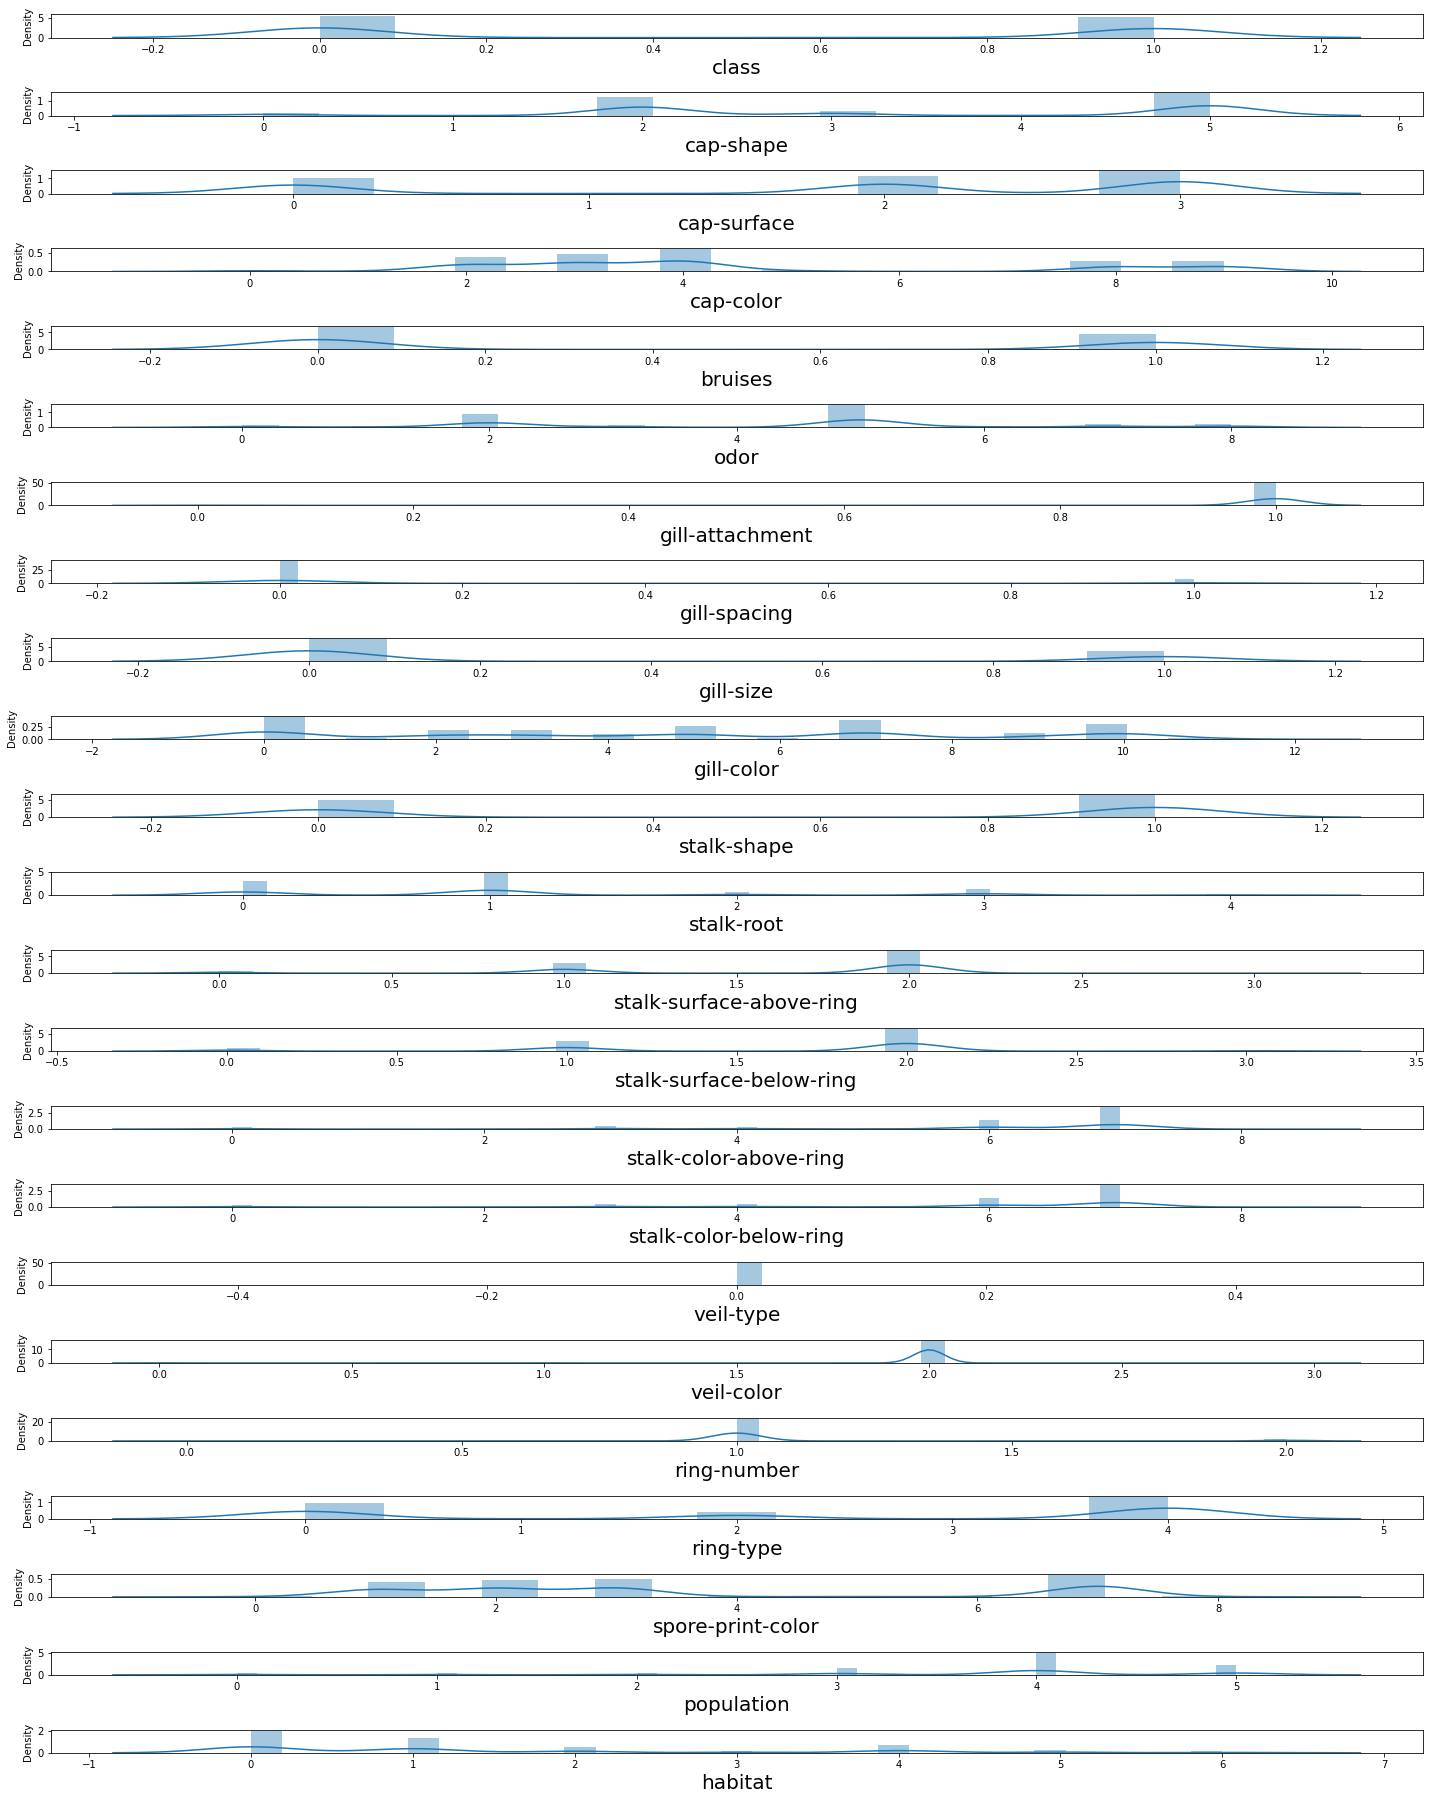

In [11]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=23:
        ax=plt.subplot(23,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Checking correlation

In [12]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


#### Veil-type shows no correlation with target variable as its NaN, as the column consists of a single data

In [13]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


#### Data description seems to be fine

#### Checking for outlier

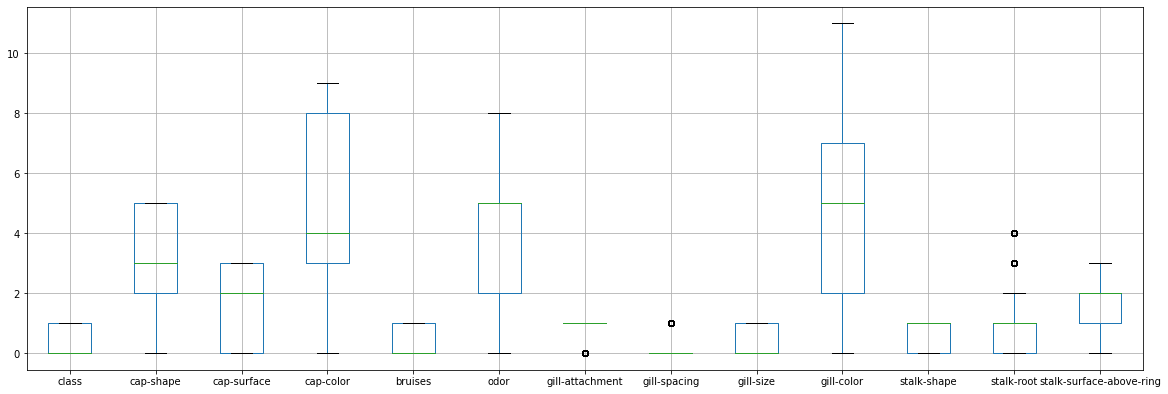

In [15]:
df.iloc[:,:13].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

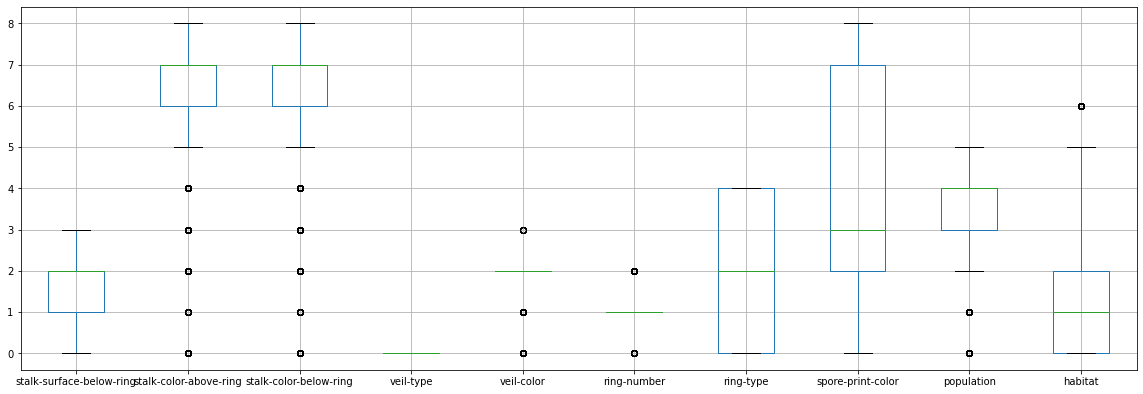

In [16]:
df.iloc[:,13:23].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

#### In the dataset outliers exist in columns gill-attachment,gill-spacing,stalk root,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,population,habitat

#### Now lets check for skewness

In [17]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

#### Skewness exists in gill-attachment,gill-spacing,cap-color,gill-size,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,ring-number,population,habitat

#### Dropping column veil-type as it doesnt have any correlation with target variable

In [26]:
df = df.drop(columns='veil-type')
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1


#### Removing outliers from the dataset

In [27]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(8124, 22)

In [28]:
print(z)

[[1.0366127  1.02971224 0.14012794 ... 0.67019486 0.5143892  2.03002809]
 [0.96468045 1.02971224 0.14012794 ... 0.2504706  1.31310821 0.29572966]
 [0.96468045 2.08704716 0.14012794 ... 0.2504706  1.31310821 0.86714922]
 ...
 [0.96468045 0.8403434  0.14012794 ... 1.50964337 2.11182722 0.28570978]
 [1.0366127  0.21699152 0.95327039 ... 1.42842641 0.28432981 0.28570978]
 [0.96468045 1.02971224 0.14012794 ... 0.16925365 2.11182722 0.28570978]]


In [29]:
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]

Row numbers :  [1816 2128 2128 ... 8121 8123 8123]
Column numbers :  [1816 2128 2128 ... 8121 8123 8123]


In [30]:
df1 = df.drop(df.index[index])
df1.shape

(6568, 22)

#### Data loss in percentages

In [31]:
loss = (8124-6568)/8124*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  19.15312653865091 % of data


#### Data loss is too high, so lets keep the outliers as it is

### Splitting the data into feature and target variable

In [32]:
X = df.drop("class",axis = 1)
y = df['class']

### Checking for the relationship between features and target

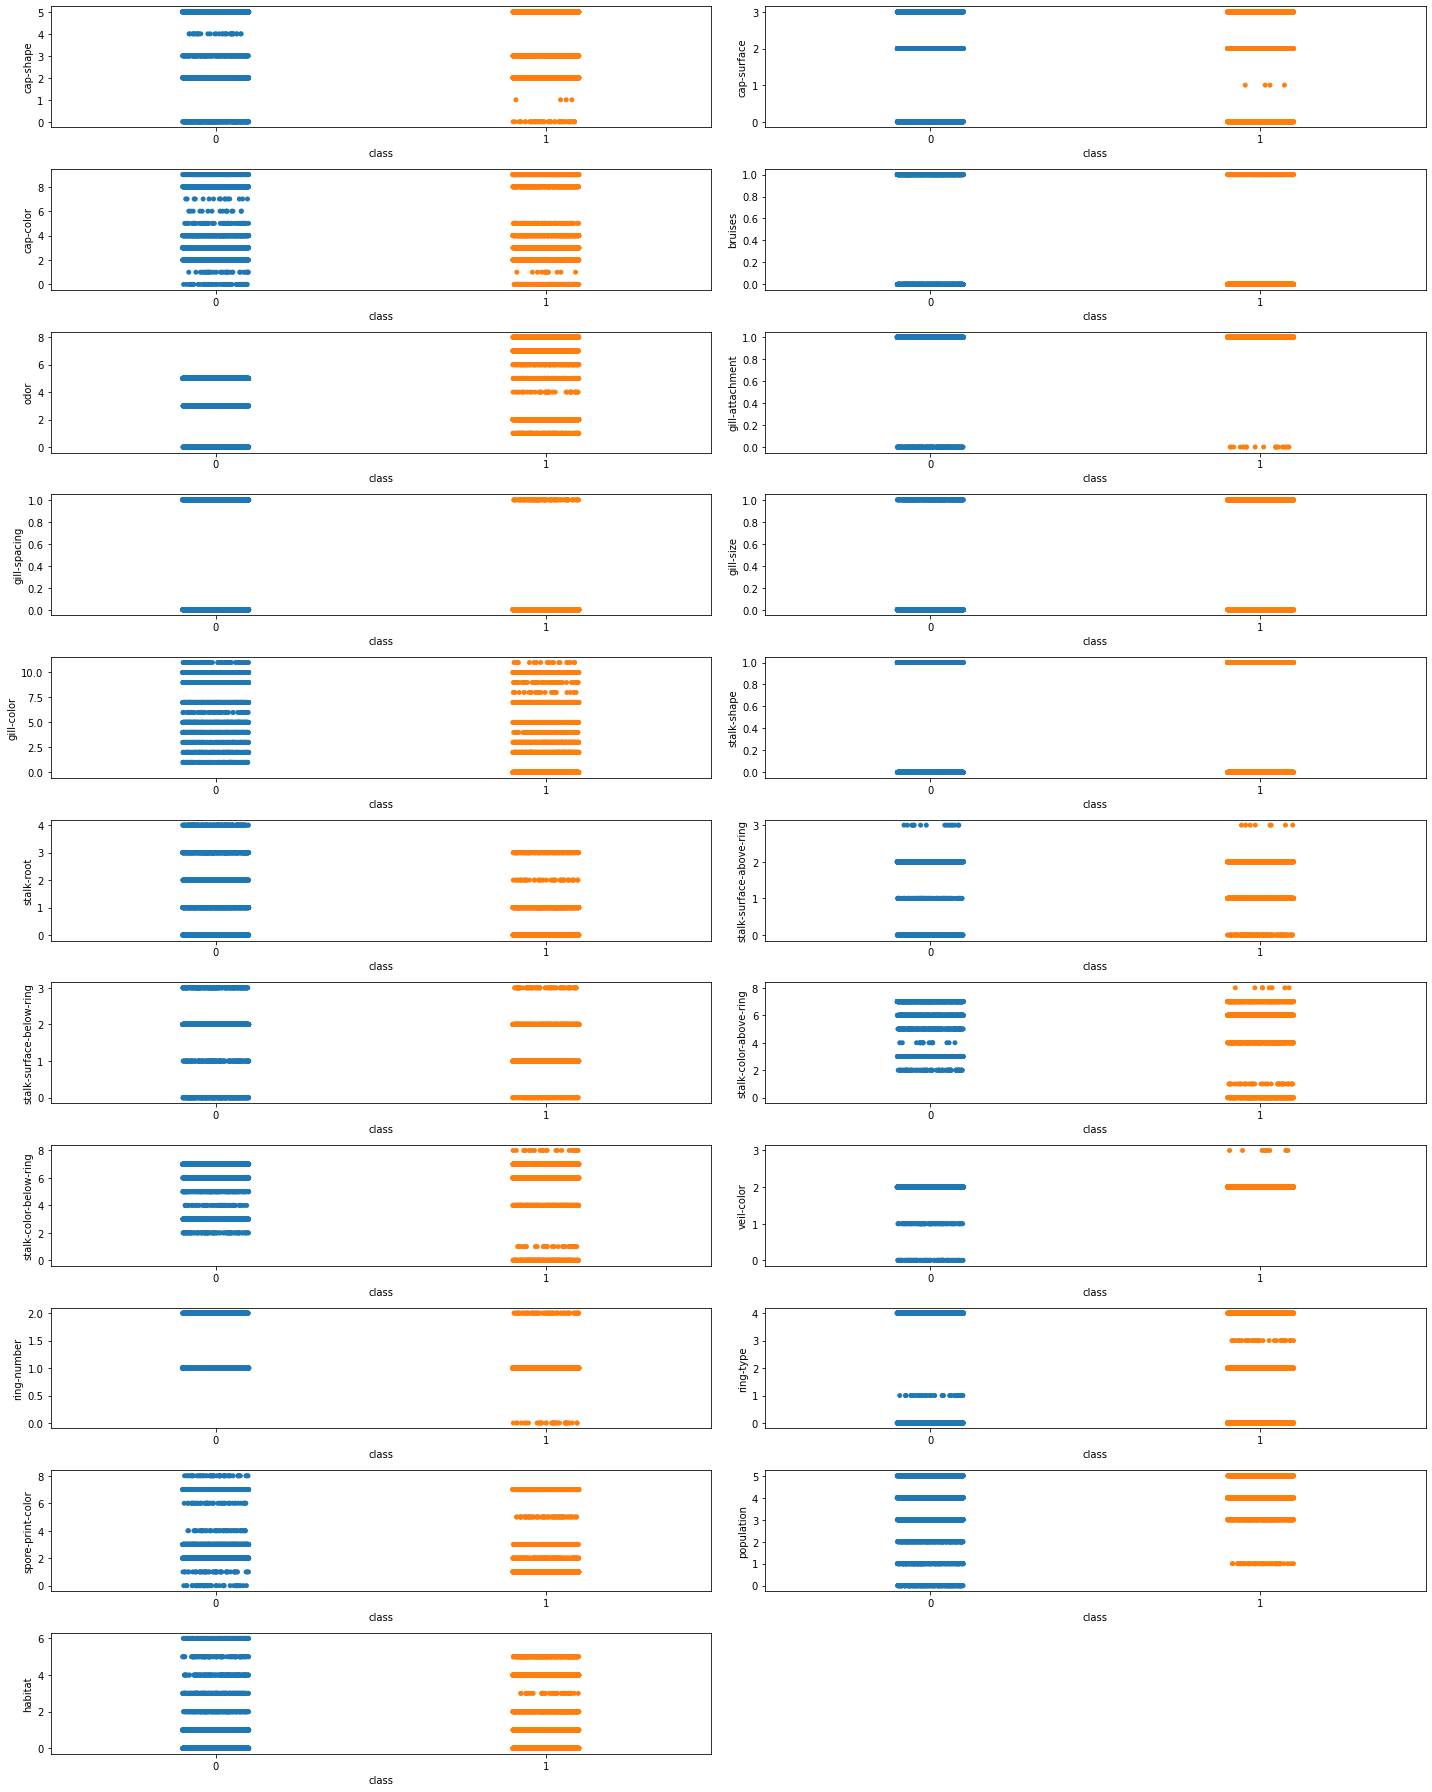

In [33]:
plt.figure(figsize=(20,25))
pltnumber = 1
for column in X:
    if pltnumber<=22:
        ax=plt.subplot(11,2,pltnumber)
        sns.stripplot(y,X[column])
    pltnumber+=1
plt.tight_layout()

#### The relation seems to be good as all the datapoints lies on either 0 or 1

#### Removing the skewness by tranforming

In [34]:
from sklearn.preprocessing import power_transform
X = power_transform(X,method='yeo-johnson')
X

array([[ 1.03577474,  0.05017017, -0.02673986, ..., -0.53714841,
        -0.80052972,  1.51548871],
       [ 1.03577474,  0.05017017,  1.56319371, ...,  0.01906382,
        -1.47485647,  0.11634762],
       [-2.02788189,  0.05017017,  1.30592999, ...,  0.01906382,
        -1.47485647,  1.06633941],
       ...,
       [-0.85127533,  0.05017017, -0.02673986, ..., -2.80619461,
        -1.89857525,  0.70247929],
       [-0.23408877,  0.99864626, -0.02673986, ...,  1.29862534,
         0.15412432,  0.70247929],
       [ 1.03577474,  0.05017017, -0.02673986, ...,  0.4401869 ,
        -1.89857525,  0.70247929]])

#### Scaling the dataset

In [36]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

#### Lets find the best random state

In [38]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.9620876415558838 when 180 is the random state


#### Spliting the dataset into train and test

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 180)

In [40]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression model is ",accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred))
classification_rep = classification_report(y_test,y_pred)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.9620876415558838
Confusion Matrix 
 [[1021   36]
 [  41  933]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1057
           1       0.96      0.96      0.96       974

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



#### Logistic regression gives an accuracy of 96.2%

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
print("Accuracy of Decision Tree classifier model is ",accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  1.0
Confusion Matrix 
 [[1057    0]
 [   0  974]]
Classification report ; 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### Decision tree classifier model gives an accuracy of 100%

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
print("Accuracy of Random forest classifier model is ",accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  1.0
Confusion Matrix 
 [[1057    0]
 [   0  974]]
Classification report ; 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### Random forest classifier is also giving an accuracy of 100%

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
print("Accuracy of SVC model is ",accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.9985228951255539
Confusion Matrix 
 [[1054    3]
 [   0  974]]
Classification report ; 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### SVC is also giving an accuracy of 99.8%

### High accuracy can be due to overfitting, so lets check that

In [44]:
cvs = cross_val_score(lr,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.8181541492989769


In [45]:
cvs = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of Decision tree model is : ",cvs.mean())

Cross validation score of Decision tree model is :  0.9606062902614626


In [46]:
cvs = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of Random forest model is : ",cvs.mean())

Cross validation score of Random forest model is :  0.8884431223948466


In [47]:
cvs = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC model is : ",cvs.mean())

Cross validation score of SVC model is :  0.8638184918529745


#### Decision Tree seems to be the best model, as the difference is minimum in case of Decision Tree 

### Hyperparameter tuning

In [48]:
params = {'criterion':['gini','entropy'],
          'max_depth':[4,7],
         'min_samples_leaf':range(1,10),
         'min_samples_split':range(2,12,2)}

In [49]:
grd = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5)

In [50]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 7],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 12, 2)})

In [51]:
grd.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [52]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=1,min_samples_split=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy score is : ",accuracy_score(y_test,y_pred))

Accuracy score is :  1.0


##### DecisionTreeClassifier turns out to be the best model as it has the highest accuracy